# Pandas EDA Checkpoint

This checkpoint is designed to test your understanding of the content from the EDA with Pandas Cumulative Lab.

Specifically, this will cover:

* Using pandas to load data
* Using pandas to engineer a new feature of a dataset
* Using pandas methods and attributes to access information about a dataset


## Your Task: Explore Price per Square Foot and Neighborhoods using `pandas`

### Data Understanding

In this repository under the file path `data/ames_housing.csv` there is a CSV file containing the Ames Housing dataset. This is the same dataset you have worked with previously, but the file path may differ!

The features of interest for this analysis will be:

**SalePrice**: `Sale price of the house in dollars`

**GrLivArea:** `Above grade (ground) living area square feet`

**Neighborhood:** `Physical locations within Ames city limits`

### Requirements

#### 1. Import the Relevant Library

#### 2. Load the Data into a DataFrame Called `housing_data`

#### 3. Create a New Column `price_per_square_ft`

#### 4. Find the Mean Price per Square Foot

#### 5. Plot Price per Square Foot for Select Neighborhoods

#### 6. Find the Most Common Neighborhood

## 1. Import the Relevant Library

In the cell below, import the `pandas` library using the standard alias `pd`.

In [1]:
import pandas as pd

In [2]:
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS
# Checking for pandas
import sys
assert "pandas" in sys.modules

# Checking that it was imported with the appropriate alias
assert type(pd.__version__) == str
### END HIDDEN TESTS

## 2. Load the Data into a DataFrame Called `housing_data`

The file path is `data/ames_housing.csv`. Use pandas ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)) to read in the data from this CSV file and create a dataframe named `housing_data`.

In [3]:
# Replace None with appropriate code

housing_data = None

### BEGIN SOLUTION
housing_data = pd.read_csv("data/ames_housing.csv")
### END SOLUTION

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
assert type(housing_data) == pd.DataFrame

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS

# Check that there are the correct number of rows
assert housing_data.shape[0] == 1460

# The instructions didn't specify whether `Id` should
# be the index or just a column, so we won't check the
# number of columns directly. But we will check whether
# the necessary columns are there
for col in ["SalePrice", "GrLivArea", "Neighborhood"]:
    assert col in housing_data.columns

### END HIDDEN TESTS

## 3. Create a New Column `price_per_square_ft`

Create a new column of the dataframe that represents the price per square foot of the house.

Here we'll define price per square foot as the `SalePrice` divided by the `GrLivArea`.

The new column should be called `price_per_square_ft`.

In [5]:
housing_data["price_per_square_ft"] = housing_data["SalePrice"] / housing_data["GrLivArea"]

In [6]:
assert "price_per_square_ft" in housing_data.columns

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS

# Check the data type of the column
assert housing_data["price_per_square_ft"].dtype == 'float64'

# Spot checking a specific price
assert round(housing_data.iloc[10]["price_per_square_ft"], 2) == 124.52

### END HIDDEN TESTS

## 4. Find the Mean Price per Square Foot

Assign the value of the mean price per square foot to the variable `mean_price_per_square_ft`.

In [7]:
# Replace None with appropriate code

mean_price_per_square_ft = None

### BEGIN SOLUTION
mean_price_per_square_ft = housing_data["price_per_square_ft"].mean()
### END SOLUTION

mean_price_per_square_ft

120.57287807326857

In [8]:
import numpy as np
# mean price per square foot should be a floating point number
assert (type(mean_price_per_square_ft) == float) or (type(mean_price_per_square_ft) == np.float64)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS

assert round(mean_price_per_square_ft, 2) == 120.57

### END HIDDEN TESTS

## 5. Plot Price per Square Foot for Select Neighborhoods

The plotting code in the cell below is mostly completed for you. We are trying to create a bar graph showing the average price per square foot by neighborhood, for six specific neighborhoods in west Ames.

We will use `pd.DataFrame.plot.bar` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)).

**The only things you need to specify are `x` and `y`. Both are string values.**

`x` should be the categorical column name (as a string) for the neighborhood, and `y` should be the relevant numeric column name (as a string) for the price per square foot.

The plot this creates should look like this:

![neighborhood plot](images/neighborhood_plot.png)

(Don't worry too much about the subsetting and grouping that is happening here. `x` and `y` are column names that exist in the full `housing_data` dataframe as well as the `grouped_by_neighborhood` subset.)

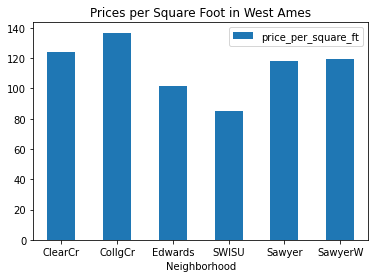

In [9]:
# Replace None with appropriate code

x = None
y = None

### BEGIN SOLUTION
x = "Neighborhood"
y = "price_per_square_ft"
### END SOLUTION

# Plotting code (do not edit)
subset = housing_data[housing_data["Neighborhood"].isin([
    "SawyerW", "Sawyer", "ClearCr", "CollgCr", "Edwards", "SWISU"
])]
grouped_by_neighborhood = subset.groupby("Neighborhood").mean().reset_index()
ax = grouped_by_neighborhood.plot.bar(x=x, y=y, rot=0, title="Prices per Square Foot in West Ames");

In [10]:
# x and y should be strings
assert type(x) == str
assert type(y) == str

# x and y should be names of columns
assert x in housing_data.columns
assert y in housing_data.columns

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS

# Checking the string values of x and y
assert x == "Neighborhood"
assert y == "price_per_square_ft"

# Spot checking the actual plot
# First rectangle should be ClearCr with a height of ~124
clearcr_rect = ax.containers[0][0]
assert round(clearcr_rect.get_height(), 2) == 124.24

### END HIDDEN TESTS

## 6. Find the Most Common Neighborhood

Using the `Neighborhood` column, find the name of the neighborhood that occurs most frequently in this dataset.

Assign `name` to the name of the neighborhood (a string) and `frequency` to the number of times that neighborhood appears (an integer).

If you're getting stuck, check out [this method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Your answer can be "hard-coded" (i.e. just typed in surrounded by `"`) or you can find it programmatically.

In [11]:
# Replace None with appropriate code

name = None
frequency = None

### BEGIN SOLUTION

neighborhood_value_counts = housing_data["Neighborhood"].value_counts()

# Extracting data from series
name = neighborhood_value_counts.index[0]
frequency = neighborhood_value_counts.loc[name]

# It's also ok to just print out the value counts then do this:
# name = "NAmes"
# frequency = 225

### END SOLUTION

name, frequency

('NAmes', 225)

In [12]:
# name should be a string
assert type(name) == str

# frequency should be an integer
assert type(frequency) == int or type(frequency) == np.int64

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS
### BEGIN HIDDEN TESTS

# Checking for specific values
assert name == "NAmes"
assert frequency == 225

### END HIDDEN TESTS